In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import jaxgp.tests as tests

In [2]:
def sin(x):
    return jnp.sin(2*x[0] + x[1])

In [3]:
names = ["franke", "himmelblau", "easom", "ackley", "sin"]

optimizers = ["L-BFGS-B", "TNC", "SLSQP"]

functions = [tests.testfunctions.franke,tests.testfunctions.himmelblau, tests.testfunctions.easom, tests.testfunctions.ackley, sin]

ranges = [(jnp.array([0.0,1.0]), jnp.array([0.0,1.0])), 
          (jnp.array([-5.0,5.0]), jnp.array([-5.0,5.0])),
          (jnp.array([-10.0,10.0]), jnp.array([-10.0,10.0])),
          (jnp.array([-5.0,5.0]), jnp.array([-5.0,5.0])),
          (jnp.array([0.0,2*jnp.pi]), jnp.array([0.0,2*jnp.pi]))]


num_gridpoints = jnp.array([100,100])

In [4]:
with open("test.txt", mode="w") as f:
    tests.optimizertesting.compare_optimizer_data(functions, ranges, names, optimizers, num_gridpoints, "./prediction_files", f.write)

In [5]:
X, Y = tests.optimizertesting.create_training_data_2D(0, num_gridpoints, ranges[0], 0.0, tests.testfunctions.franke)
Y = Y[:,0]

means = jnp.load("./prediction_files/frankemeansTNC.npz")
stds = jnp.load("./prediction_files/frankestdTNC.npz")

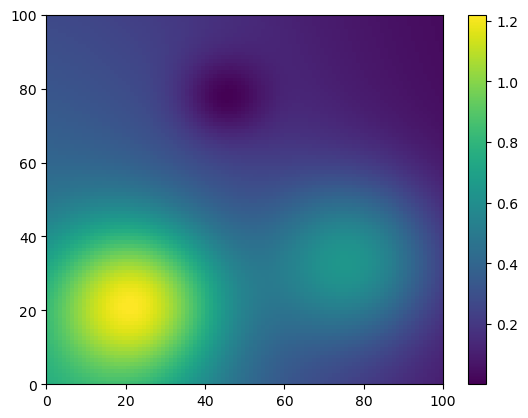

In [6]:
plt.pcolormesh(Y.reshape(100,100))
plt.colorbar()

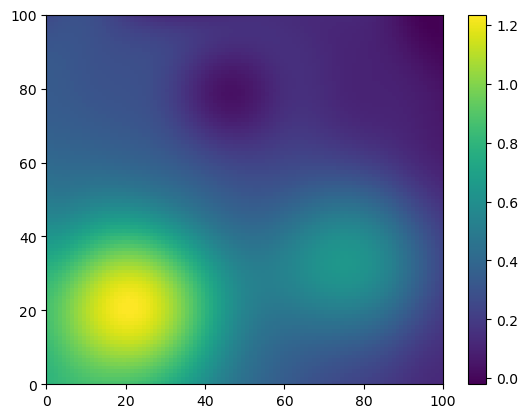

In [7]:
plt.pcolormesh(means["arr_0"].reshape(100,100))
plt.colorbar()

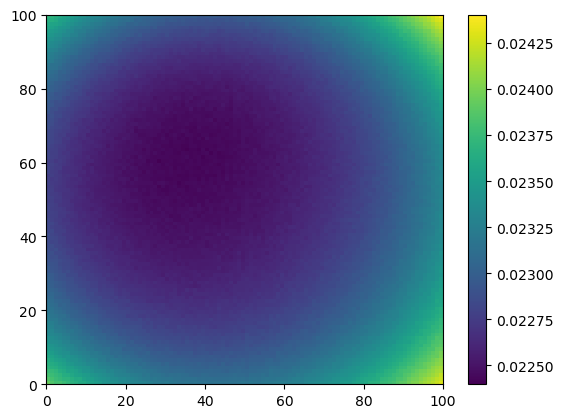

In [8]:
plt.pcolormesh(stds["arr_1"].reshape(100,100))
plt.colorbar()